# Customer Churn Analysis

This notebook performs an exploratory data analysis (EDA) and builds a predictive model to understand and predict customer churn in a telecommunications company.

## 1. Data Loading and Inspection

First, we load the dataset and perform an initial inspection to understand its structure, check for missing values, and view the first few rows.

In [8]:
from google.colab import files
uploaded = files.upload()

Saving Telco-Customer-Churn.csv to Telco-Customer-Churn (1).csv


In [9]:
import pandas as pd
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
print(df.head())
print(df.info())
print(df.isnull().sum())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

## 2. Data Cleaning

Next, we check for and remove any duplicate rows in the dataset to ensure data integrity.

In [11]:
df.drop_duplicates(inplace=True)

## 3. Exploratory Data Analysis (EDA)

We'll now explore the data to identify patterns, trends, and relationships that can help us understand customer churn.

# . Churn Distribution

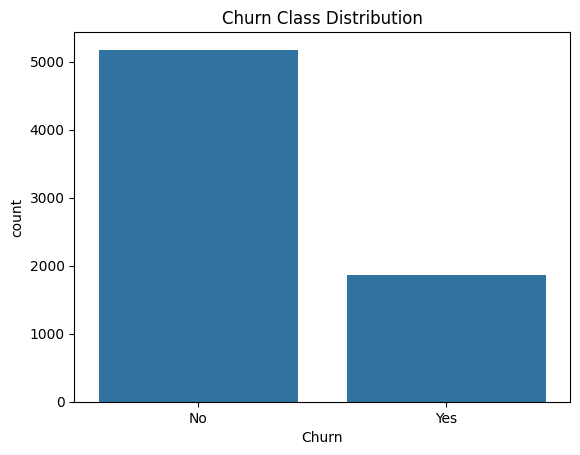

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=df)
plt.title('Churn Class Distribution')
plt.show()

# . Feature Analysis

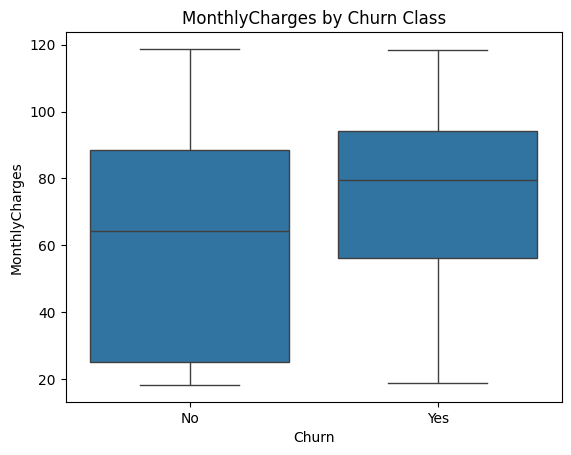

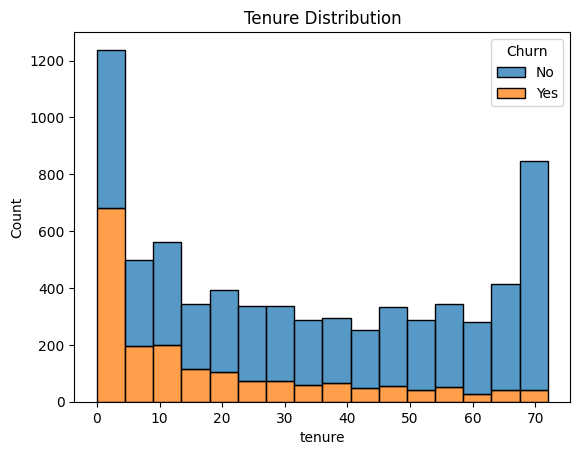

In [19]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('MonthlyCharges by Churn Class')
plt.show()
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack')
plt.title('Tenure Distribution')
plt.show()

# . Correlation Analysis

Let's visualize the correlations between the numerical features.

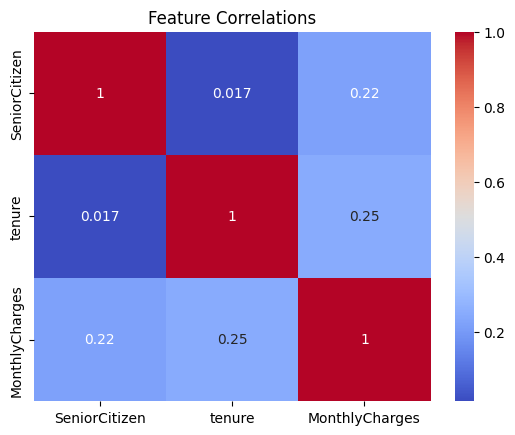

In [24]:
corr = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()


# . Group Statistics

In [21]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
print(df.groupby('Churn')[numeric_df.columns].mean())

       SeniorCitizen     tenure  MonthlyCharges
Churn                                          
No          0.128721  37.569965       61.265124
Yes         0.254682  17.979133       74.441332


# Data Preparation for modelling

In [22]:
X = df.drop(['Churn', 'customerID'], axis=1)
X = pd.get_dummies(X)
y = df['Churn'].map({'Yes': 1, 'No': 0})  # Adjust mapping if needed

# Logistic Regression Model

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
importance = pd.Series(model.coef_[0], index=X.columns)
print(importance.sort_values(ascending=False))

TotalCharges_20.2      1.506043
TotalCharges_20.5      1.320280
TotalCharges_19.95     1.221220
TotalCharges_20.1      1.203540
TotalCharges_19.6      1.138580
                         ...   
TotalCharges_335.75   -0.730391
TotalCharges_118.25   -0.736743
TotalCharges_50.15    -0.755526
TotalCharges_151.75   -0.827172
TotalCharges_44       -0.877083
Length: 6575, dtype: float64


## EDA Notes and Observations

Based on the exploratory data analysis, the following observations were made:

*   **Dataset Overview:** The dataset contains information about customer churn with several features including demographic information, services subscribed, contract details, and payment information.
*   **Missing Values and Duplicates:** No missing values or duplicate rows were found in the dataset, indicating a clean dataset for analysis.
*   **Churn Distribution:** The churn distribution shows that there is an imbalance in the target variable, with significantly more customers who did not churn compared to those who did churn. This imbalance should be considered during model building and evaluation.
*   **Monthly Charges and Churn:** Customers who churned tend to have higher monthly charges compared to those who did not churn, as seen in the box plot.
*   **Tenure and Churn:** The histogram shows that customers with shorter tenure are more likely to churn compared to those with longer tenure.
*   **Feature Correlations:** The heatmap of numerical features shows a moderate positive correlation between `tenure` and `MonthlyCharges`. `SeniorCitizen` has a weak positive correlation with `MonthlyCharges`.
*   **Churn by Numerical Features:** The mean values of numerical features grouped by churn status show that:
    *   Senior citizens have a higher churn rate.
    *   Customers who churned have significantly lower average tenure.
    *   Customers who churned have higher average monthly charges.

These observations provide valuable insights into the factors that might be influencing customer churn and will be helpful in building a predictive model.